## Confidence Interval study for Binomial distribution
This code will help to understand the concept of Confidence Interval and assess the impact of different sample sizes on Confidence interval.<br>

<b>So what is Confidence Interval?</b><br>
The confidence interval (CI): A confidence interval is an estimate of an interval in statistics that may contain a population parameter. The unknown population parameter is found through a sample parameter calculated from the sampled data. For example, the population mean μ is found using the sample mean $\bar{x}$.

<b>How is confidence interval defined</b>
The interval is generally defined by its lower and upper bounds. The confidence interval is expressed as a percentage (the most frequently quoted percentages are 90%, 95%, and 99%). The percentage reflects the confidence level.

<b>How the output of this code going to help me?</b><br>
Output in _Step 4_ states how increase in smaple size affects capturing of population mean<br>
_Step 5_ provies statistics for output in tabular format

<b>Does this code provides any kind of plots?</b><br>
Yes, _Step 6_ provides plot of percent of samples capturing population mean vs log of sample size. Here log of sample size is taken since without it points would be scattered too far on the plot

<b>Can the statistics be extarcted in excel</b><br>
Yes, in _Step 8_ the statistics can exported in excel

<b><ins>Step 1</ins>: Import libraries</b>

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import random
import statistics
from datetime import datetime
import pandas as pd
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<b><ins>Step 2</ins>: Set 
    * Population size
    * Confidence interval
    * List of different sample sizes
    * Number of samples to be polled
<b>

In [17]:
# Population size
population_size = 100000

# Confidence
confidence = 0.95

# Sample size
n_list = [2, 4, 10, 20, 30, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]

# Number of sample to be polled
number_of_sample = 10000

<b><ins>Step 3</ins>: Generate population data</b><br><br>
Distribution: Binomial

Total population: 100000  Population mean: 10.0017 Population standard deviation: 2.2382  Min: 1  Max:  19


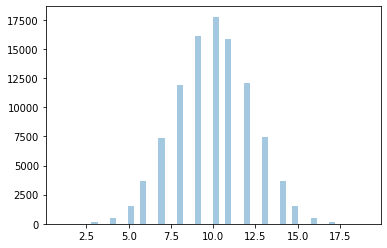

In [18]:
# Generate population
# Binomial distribution

plt.figure()
np.random.seed(21)
# n: number of trials.
# p: probability of occurence of each trial (e.g. for toss of a coin 0.5 each).
# size: The shape of the returned array.
a = np.random.binomial(n=20, p=0.5, size=population_size)
sns.distplot(a, hist=True, kde=False)
population_mean = round(np.mean(a), 4)
population_sd = round(np.std(a), 4)
print("Total population:", str(population_size), " Population mean:", population_mean,  "Population standard deviation:", population_sd,
      " Min:", round(min(a), 4), " Max: ", round(max(a), 4))

In [19]:
def mean_confidence_interval(data, confidence):
    a = 1.0 * np.array(data)
    n = len(data)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [20]:
def generate_list_of_mean(n):
    
    list_of_mean = []
    # Convert to list and into float at the same time
    a_list = list(np.float_(a))
    i=0
    for _ in range(number_of_sample):
        sample = []
        # Generate random sample without replacement
        sample = random.sample(a_list, n)
        # print("sample:",sample)
        sample_mean, sample_lower_95CI, sample_higher_95CI = mean_confidence_interval(sample, confidence)
        population_mean_in_ci_range = is_population_mean_in_ci_for_sample(sample_lower_95CI, sample_higher_95CI)
        if population_mean_in_ci_range:
            i = i + 1
        # print("Sample Lower CI:", sample_lower_95CI, "Sample Higher CI:", sample_higher_95CI)
        # print("Is population mean in CI for sample:", population_mean_in_ci_range)
    return round((i/number_of_sample), 2)

In [21]:
def is_population_mean_in_ci_for_sample(sample_lower_95CI, sample_higher_95CI):
    # print("Population mean:", population_mean)
    if population_mean <= sample_higher_95CI and population_mean>= sample_lower_95CI:
        return True
    else:
        return False

In [22]:
import pathlib

def write_df_to_excel(df):
    # Converting datetime object to string
    dateTimeObj = datetime.now()
    timestampStr = dateTimeObj.strftime("%Y%m%d%H%M%S")

    output_excel_name = "confidence_interval_"+str(timestampStr)+".xlsx"

    df.to_excel(output_excel_name, index=0)
    print("Parameter data written to new excel:", output_excel_name)

In [23]:
def rotate_for_each_sample_size():
    res_array = []
    for n in n_list:
        percent_ci_range_covering_pop_mean = generate_list_of_mean(n)

        print("For sample size ("+ str(n) +"):" + str(round(round(percent_ci_range_covering_pop_mean*100, 0), 0)) +
              "% of sample captures population mean with "+ str(confidence*100) +"% Confidence Interval")
        
        return_array = (
            {
                'Population size': population_size,
                'Population mean': population_mean,
                'Population sd': population_sd,
                'Confidence': confidence,
                'Samples pooled': number_of_sample,
                'Sample size' : n,
                'Percent of samples capturing population mean within CI': percent_ci_range_covering_pop_mean
            }
        )
        res_array.append(return_array)
    return res_array

<b><ins>Step 4</ins>: Output </b>

In [24]:
result_array = []
result_array = rotate_for_each_sample_size()
final_df = pd.DataFrame(result_array)

For sample size (2):88.0% of sample captures population mean with 95.0% Confidence Interval
For sample size (4):96.0% of sample captures population mean with 95.0% Confidence Interval
For sample size (10):95.0% of sample captures population mean with 95.0% Confidence Interval
For sample size (20):95.0% of sample captures population mean with 95.0% Confidence Interval
For sample size (30):95.0% of sample captures population mean with 95.0% Confidence Interval
For sample size (50):95.0% of sample captures population mean with 95.0% Confidence Interval
For sample size (100):95.0% of sample captures population mean with 95.0% Confidence Interval
For sample size (200):95.0% of sample captures population mean with 95.0% Confidence Interval
For sample size (500):95.0% of sample captures population mean with 95.0% Confidence Interval
For sample size (1000):95.0% of sample captures population mean with 95.0% Confidence Interval
For sample size (2000):95.0% of sample captures population mean wit

<b><ins>Step 5</ins>: Output statistics </b>

In [28]:
final_df['Log of sample size'] = np.log(final_df['Sample size'])
final_df['Percent of samples capturing population mean within CI'] = final_df['Percent of samples capturing population mean within CI']*100
final_df

,Population size,Population mean,Population sd,Confidence,Samples pooled,Sample size,Percent of samples capturing population mean within CI,Log of sample size
0,100000,10.0017,2.2382,0.95,10000,2,88.0,0.693147
1,100000,10.0017,2.2382,0.95,10000,4,96.0,1.386294
2,100000,10.0017,2.2382,0.95,10000,10,95.0,2.302585
3,100000,10.0017,2.2382,0.95,10000,20,95.0,2.995732
4,100000,10.0017,2.2382,0.95,10000,30,95.0,3.401197
5,100000,10.0017,2.2382,0.95,10000,50,95.0,3.912023
6,100000,10.0017,2.2382,0.95,10000,100,95.0,4.605170
7,100000,10.0017,2.2382,0.95,10000,200,95.0,5.298317
8,100000,10.0017,2.2382,0.95,10000,500,95.0,6.214608
9,100000,10.0017,2.2382,0.95,10000,1000,95.0,6.907755


<b><ins>Step 6</ins>: Plot for confidence interval</b>

<Figure size 800x800 with 0 Axes>

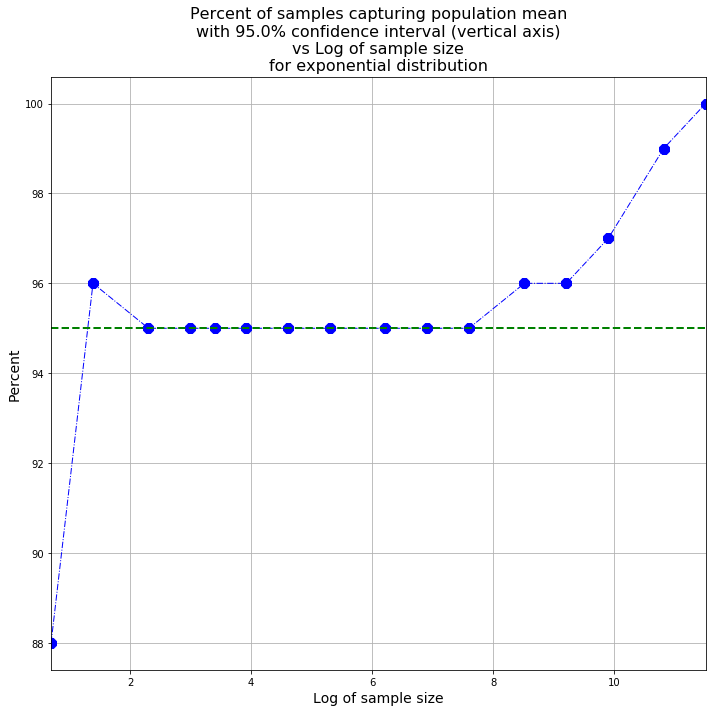

In [29]:
# Plot
plt.rcParams["figure.figsize"] = (10, 10)
plt.figure(num=None, dpi=80, facecolor='w', edgecolor='k')

#final_df.plot(x='Log of sample size', y='Percent of samples capturing population mean within CI', style='o', legend=None)
final_df.plot(x='Log of sample size', y='Percent of samples capturing population mean within CI', color='blue', marker='8', linestyle='-.', linewidth=1, markersize=10, legend=None)


title = "Percent of samples capturing population mean\nwith "+ str(confidence*100) +"% confidence interval (vertical axis)\nvs Log of sample size\nfor exponential distribution"

plt.title(title, fontsize=16)
plt.ylabel('Percent', fontsize=14)
plt.xlabel('Log of sample size', fontsize=14)
plt.axhline(confidence*100, color='green', linestyle='--', linewidth=2)
plt.grid(True, which='both')
plt.tight_layout()
plt.show()

<b><ins>Step 7</ins>: Conclusion</b>

<b>From the above output it can be concluded that as sample size increases or reaches more closer to population size, more and more sample captures population mean in Confidence interval in case of bonimial distribution</b>

<b><ins>Step 8</ins>: Write to excel (Optional)</b>

In [30]:
# write_df_to_excel(final_df)